In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import umap
import warnings
warnings.filterwarnings("ignore")

# 1. Load the dataset and make your preprocessing like normalizing the data.

In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
X = pd.DataFrame(mnist['data'])
y = pd.Series(mnist['target'])

df = pd.concat([X, y], axis=1)
df_sample = df.sample(n=10000, random_state=200)

X = df_sample.iloc[:, :784]
y = df_sample.iloc[:, -1:]

# 2. Apply UMAP to the data.

In [4]:
X_std = StandardScaler().fit_transform(X)

X_umap = umap.UMAP(n_neighbors=5, min_dist=.1, metric='cosine').fit_transform(X_std)

# 3. Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

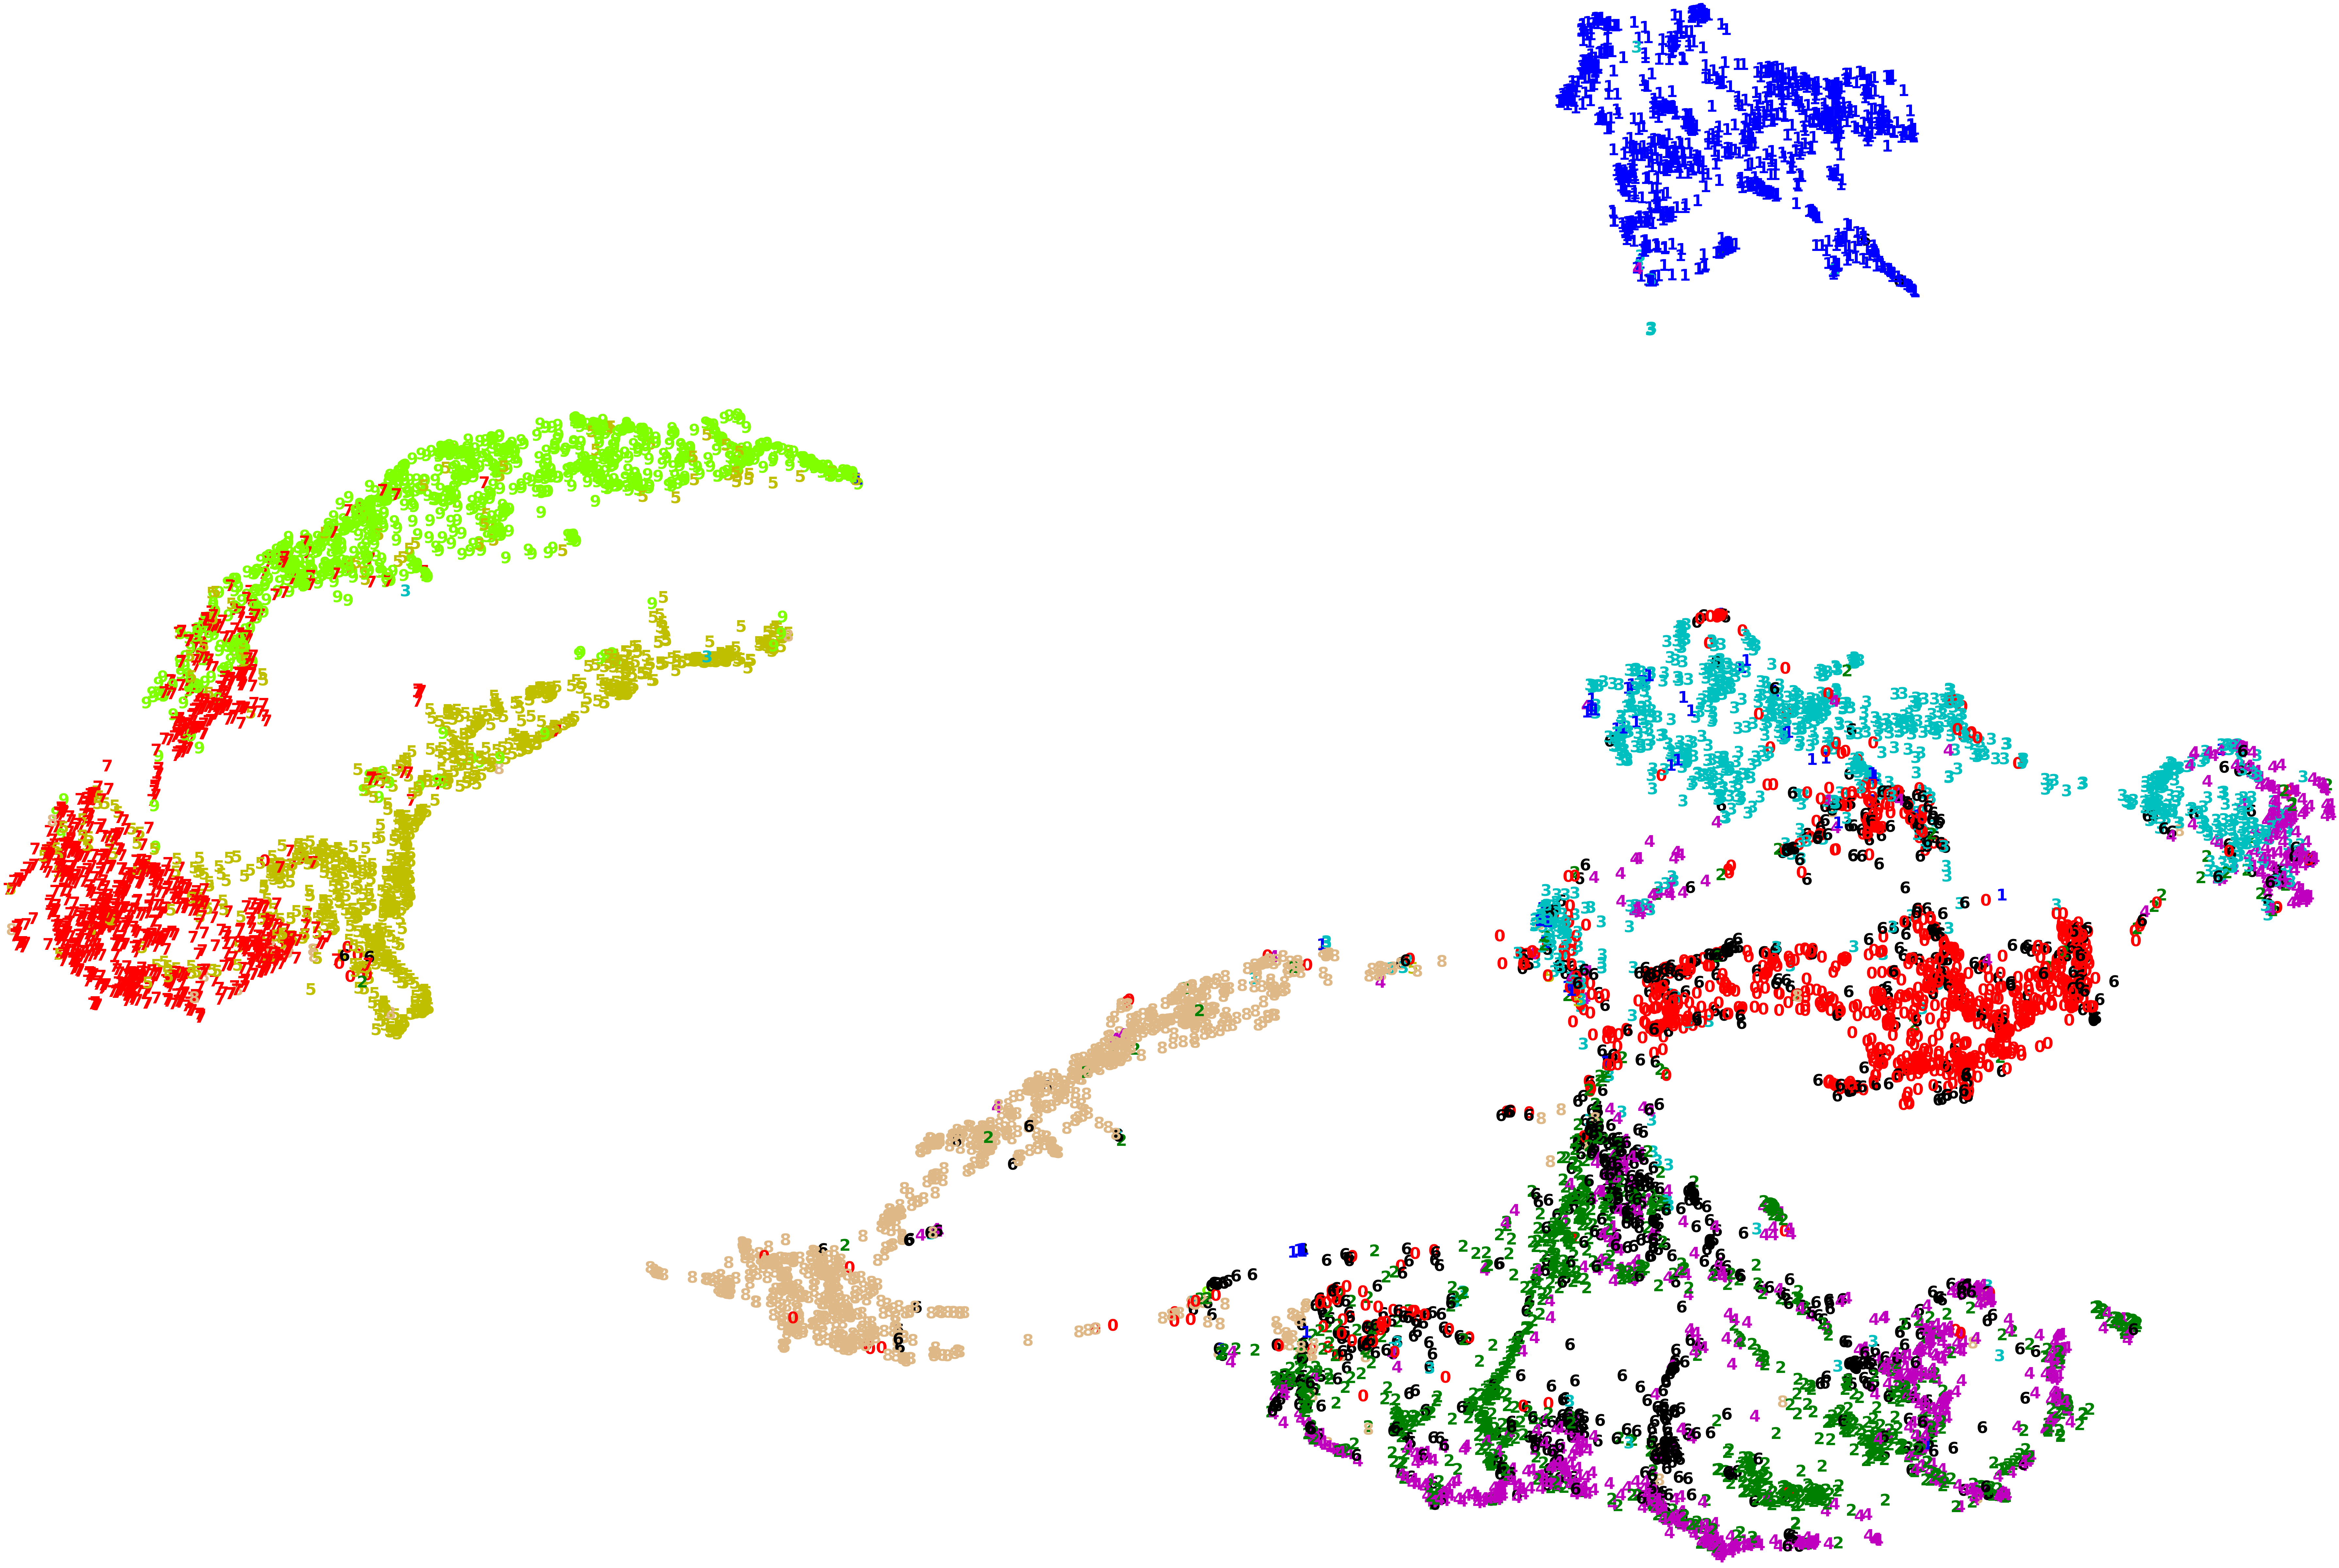

In [5]:
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(X_umap.shape[0]):
    plt.text(X_umap[i, 0], X_umap[i, 1], list(y[0])[i],
             color=colours[int(list(y[0])[i])],
             fontdict={'weight': 'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# 4. Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: UMAP or the others (t-SNE or PCA) that you applied in the assignments of the previous checkpoints?

I do not think the UMAP solution is satisfactory. There are only 2 classes that can easily be distinguished. All of the other classes are intertwined. However, it gives better results than the PCA and t-SNE solution. Also it run much quicker than the t-SNE solution.

# 5. Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?

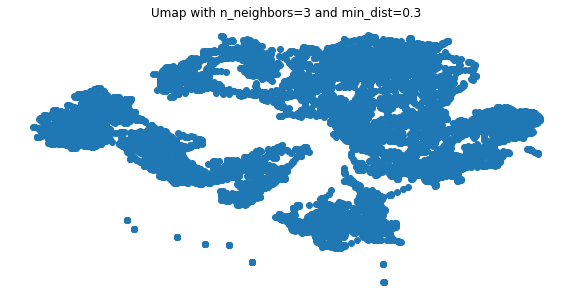

In [6]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

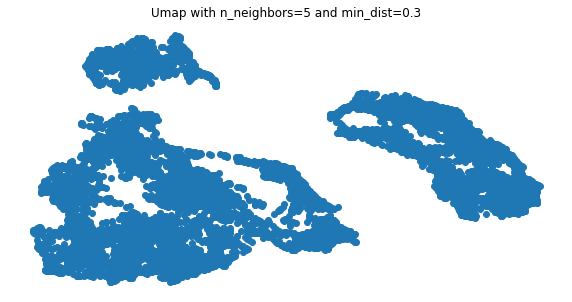

In [7]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

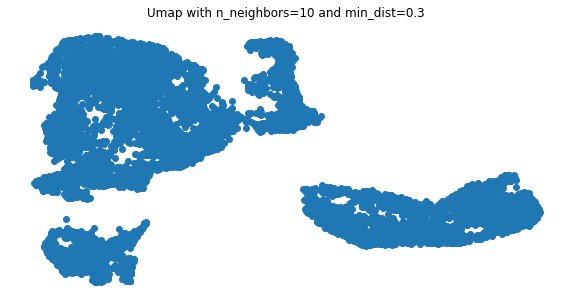

In [8]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=10 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

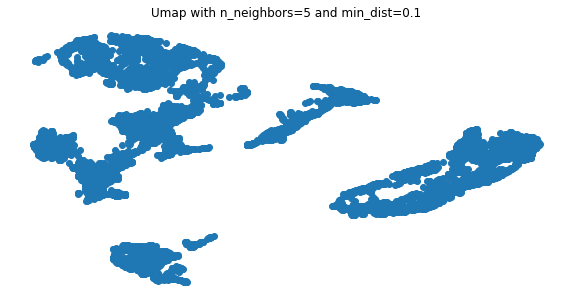

In [9]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5 and min_dist=0.1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

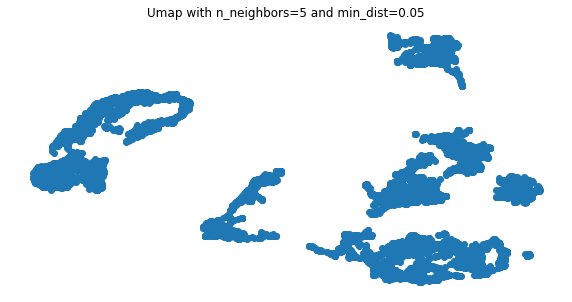

In [10]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.05,
                      metric='correlation').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5 and min_dist=0.05")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

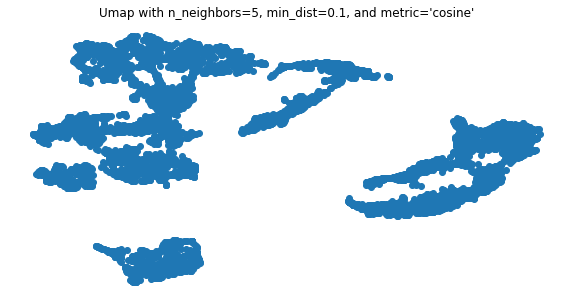

In [11]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='cosine').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5, min_dist=0.1, and metric='cosine'")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

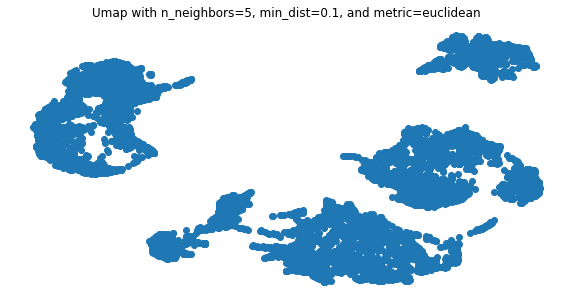

In [12]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='euclidean').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5, min_dist=0.1, and metric=euclidean")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='mahalanobis').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5, min_dist=0.1, and metric=mahalanobis")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It appears min_dist=.1, n_neighbors=5, and metric=cosine performed the best.